In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [25]:
load=ctrl.Antecedent(np.arange(0,10.1,0.1),'Load')
dlev=ctrl.Antecedent(np.arange(0,100.1,0.1),'Dirt Level')
ftype=ctrl.Antecedent(np.arange(0,100.1,0.1),'Fabric type')

time=ctrl.Consequent(np.arange(0,100.1,0.1),'Time')
wter=ctrl.Consequent(np.arange(0,100.1,0.1),'Water')

In [26]:
load['low']=fuzz.gaussmf(load.universe,0,2.5)
load['mid']=fuzz.gaussmf(load.universe,5,2.5)
load['high']=fuzz.gaussmf(load.universe,10,2.5)

In [27]:
dlev['low']=fuzz.gaussmf(dlev.universe,0,25)
dlev['mid']=fuzz.gaussmf(dlev.universe,50,25)
dlev['high']=fuzz.gaussmf(dlev.universe,100,25)

In [28]:
ftype['low']=fuzz.gaussmf(ftype.universe,0,25)
ftype['mid']=fuzz.gaussmf(ftype.universe,50,25)
ftype['high']=fuzz.gaussmf(ftype.universe,100,25)

In [29]:
time['low']=fuzz.gaussmf(time.universe,0,15)
time['mid']=fuzz.gaussmf(time.universe,50,25)
time['high']=fuzz.gaussmf(time.universe,100,15)

In [30]:
wter['low']=fuzz.gaussmf(wter.universe,0,15)
wter['mid']=fuzz.gaussmf(wter.universe,50,25)
wter['high']=fuzz.gaussmf(wter.universe,100,15)

In [37]:
rule1=ctrl.Rule(load['low']&dlev['low'],[time['low'],wter['low']])
rule2=ctrl.Rule(load['low']&dlev['mid'],[time['low'],wter['mid']])
rule3=ctrl.Rule(load['low']&dlev['high'],[time['low'],wter['mid']])
rule4=ctrl.Rule(load['mid']&dlev['low'],[time['low'],wter['mid']])
rule5=ctrl.Rule(load['mid']&dlev['mid'],[time['low'],wter['mid']])
rule6=ctrl.Rule(load['mid']&dlev['high'],[time['low'],wter['high']])
rule7=ctrl.Rule(load['high']&dlev['low'],[time['low'],wter['high']])
rule8=ctrl.Rule(load['high']&dlev['low'],[time['low'],wter['high']])
rule9=ctrl.Rule(load['high']&dlev['mid'],[time['low'],wter['high']])
rule10=ctrl.Rule(load['high']&dlev['mid'],[time['low'],wter['high']])
rule11=ctrl.Rule(load['high']&dlev['high'],[time['low'],wter['high']])

In [38]:
rule12=ctrl.Rule(ftype['low'],[time['low'],wter['low']])
rule13=ctrl.Rule(ftype['mid'],[time['low'],wter['low']])
rule14=ctrl.Rule(ftype['high'],[time['high'],wter['high']])

In [39]:
rule15=ctrl.Rule(load['high']&dlev['high']&ftype['high'],[time['high'],wter['high']])
rule16=ctrl.Rule(load['low']&dlev['low']&ftype['low'],[time['low'],wter['low']])
rule17=ctrl.Rule(load['mid']&dlev['mid']&ftype['mid'],[time['mid'],wter['mid']])

48.57487059159174
41.95160869971083


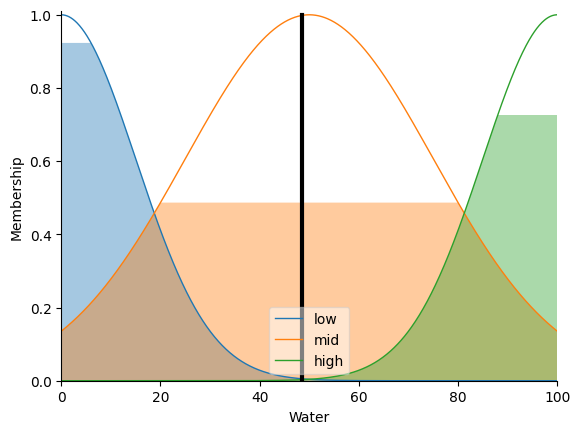

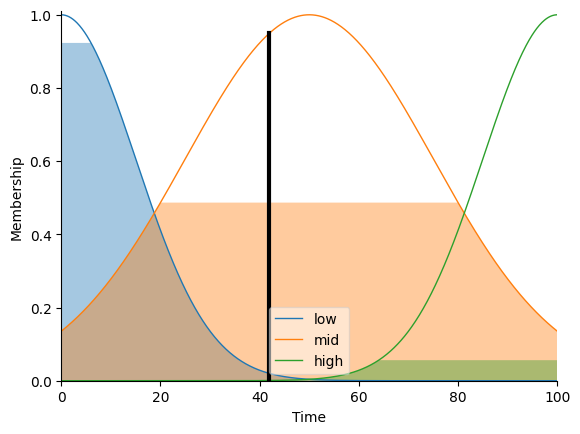

In [41]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Load']=6
tipping.input['Dirt Level']=80
tipping.input['Fabric type']=40
tipping.compute()
print(tipping.output['Water'])
print(tipping.output['Time'])
wter.view(sim=tipping)
time.view(sim=tipping)